In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colnames=['Id', 'price', 'volume', 'dollar_value', 'timestamp', 'isSellerTaker', 'a']

df1 = pd.read_csv("./data/Kyles Lambda Files-20250318/DOGEUSDT-trades-2025-03-15.csv", names=colnames, header=None)
df2 = pd.read_csv("./data/Kyles Lambda Files-20250318/DOGEUSDT-trades-2025-03-16.csv", names=colnames, header=None)
df3 = pd.read_csv("./data/Kyles Lambda Files-20250318/DOGEUSDT-trades-2025-03-17.csv", names=colnames, header=None)

In [3]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'],unit='us')
df2['timestamp'] = pd.to_datetime(df2['timestamp'],unit='us')
df3['timestamp'] = pd.to_datetime(df3['timestamp'],unit='us')
df1.head()

Id    price  volume  dollar_value                  timestamp  \
0  1051349891  0.17194  1142.0     196.35548 2025-03-15 00:00:00.004560   
1  1051349892  0.17194    58.0       9.97252 2025-03-15 00:00:00.142250   
2  1051349893  0.17194     7.0       1.20358 2025-03-15 00:00:00.142250   
3  1051349894  0.17194     7.0       1.20358 2025-03-15 00:00:00.142250   
4  1051349895  0.17194    54.0       9.28476 2025-03-15 00:00:00.142250   

   isSellerTaker     a  
0           True  True  
1           True  True  
2           True  True  
3           True  True  
4           True  True

In [4]:
df1['agressor_side'] = -df1['isSellerTaker']*2.0-1.0
df2['agressor_side'] = -df2['isSellerTaker']*2.0-1.0
df3['agressor_side'] = -df3['isSellerTaker']*2.0-1.0
df1['order_flow']=df1['volume']*df1['agressor_side']
df2['order_flow']=df2['volume']*df2['agressor_side']
df3['order_flow']=df3['volume']*df3['agressor_side']
df1.head()

Id    price  volume  dollar_value                  timestamp  \
0  1051349891  0.17194  1142.0     196.35548 2025-03-15 00:00:00.004560   
1  1051349892  0.17194    58.0       9.97252 2025-03-15 00:00:00.142250   
2  1051349893  0.17194     7.0       1.20358 2025-03-15 00:00:00.142250   
3  1051349894  0.17194     7.0       1.20358 2025-03-15 00:00:00.142250   
4  1051349895  0.17194    54.0       9.28476 2025-03-15 00:00:00.142250   

   isSellerTaker     a  agressor_side  order_flow  
0           True  True           -1.0     -1142.0  
1           True  True           -1.0       -58.0  
2           True  True           -1.0        -7.0  
3           True  True           -1.0        -7.0  
4           True  True           -1.0       -54.0

In [5]:
df1['order_flow']=df1['volume']*df1['agressor_side']
df2['order_flow']=df2['volume']*df2['agressor_side']
df3['order_flow']=df3['volume']*df3['agressor_side']

df1 = df1.set_index('timestamp')
df1 = df1.resample('1min').agg({'order_flow':'sum', 'price':'mean'})
df2 = df2.set_index('timestamp')
df2 = df2.resample('1min').agg({'order_flow':'sum', 'price':'mean'})
df3 = df3.set_index('timestamp')
df3 = df3.resample('1min').agg({'order_flow':'sum', 'price':'mean'})


Intercept: 2.1370480819518996e-05
Slope: 3.8419921721247254e-10
r_squared: 0.04447967235158745


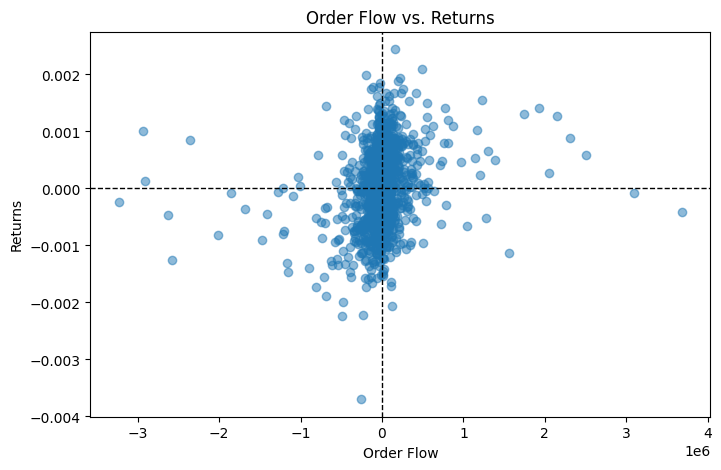

Intercept: -1.2200853418153119e-05
Slope: 5.872220378411038e-10
r_squared: 0.11091567553903192


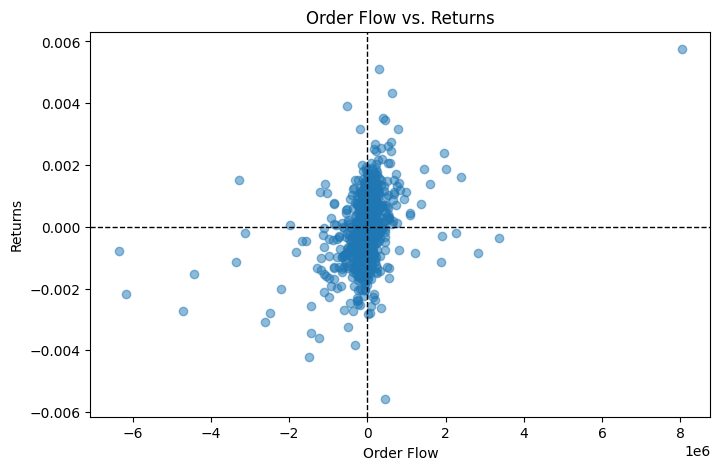

Intercept: 2.2829285376752297e-05
Slope: 4.405711837141899e-10
r_squared: 0.09477788930617592


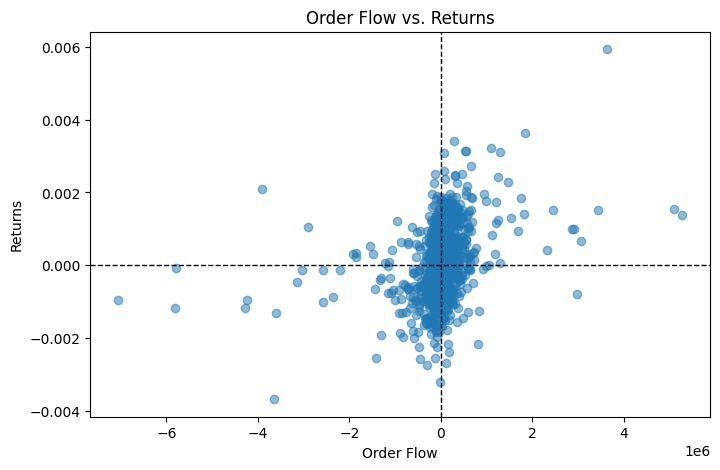

In [6]:
# Part 1
# Calculate returns, append them to existing dataframe of order flow.
# Tell me R2, slope of it, and plot a scatter plot of return vs order flow
#!pip install statsmodels
import statsmodels.api as sm

def regression(df):
    df['returns'] = df['price'].pct_change()
    df = df.dropna()
    X = sm.add_constant(df['order_flow'])  # Add intercept term
    y = df['returns']
    
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    coefficients = model.params
    print("Intercept:", coefficients['const'])
    print("Slope:", coefficients['order_flow'])
    print("r_squared:", model.rsquared)
    
    # Scatter plot
    plt.figure(figsize=(8,5))
    plt.scatter(df['order_flow'], df['returns'], alpha=0.5)
    plt.xlabel('Order Flow')
    plt.ylabel('Returns')
    plt.title('Order Flow vs. Returns')
    plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
    plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
    plt.show()

regression(df1)
regression(df2)
regression(df3)

In [7]:
def price_adj_function(of):
	return np.sign(of)

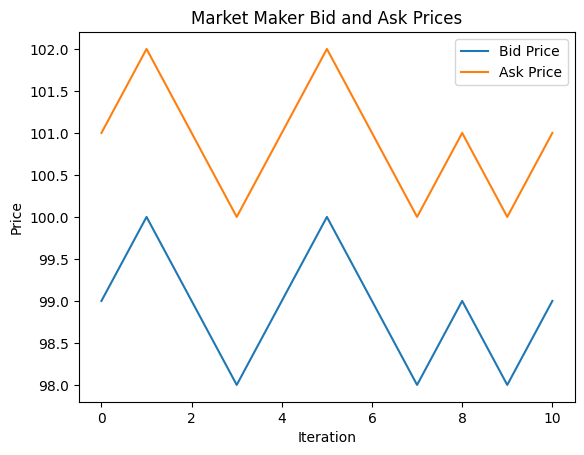

In [8]:
# Part 2
# - Implemented simulation of Kyle's model with signum price adjustment.
v=np.random.normal(100,10)
market_maker_quotes = [(99,101)]
order_flow = []
iterations = 10
for i in range(iterations):
	midprice = (market_maker_quotes[-1][0] + market_maker_quotes[-1][1])/2
	uninformed_trader_of = np.random.normal(0,1)
	informed_trader_of = (v - midprice)
	total_order_flow = uninformed_trader_of + informed_trader_of
	
	# update market maker quotes
	last_bid = market_maker_quotes[-1][0]
	last_ask = market_maker_quotes[-1][1]
	price_adjustment = price_adj_function(total_order_flow)

	new_bid, new_ask = last_bid + price_adjustment, last_ask + price_adjustment
	order_flow.append(total_order_flow)
	market_maker_quotes.append((new_bid, new_ask))

bids = [x[0] for x in market_maker_quotes]
asks = [x[1] for x in market_maker_quotes]
# Plot bid and ask prices
plt.plot(bids, label='Bid Price')
plt.plot(asks, label='Ask Price')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.title('Market Maker Bid and Ask Prices')
plt.legend()
plt.show()


# -- dont know how to handle this
#plt.scatter(df[‘order_
#plt.xlabel(‘orderflow’
#plt.ylabel(‘return’)

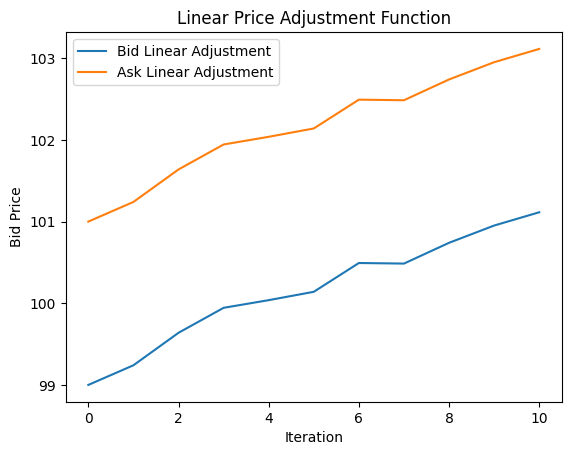

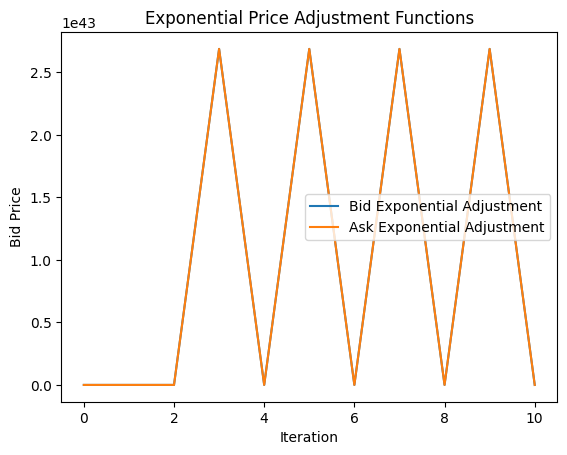

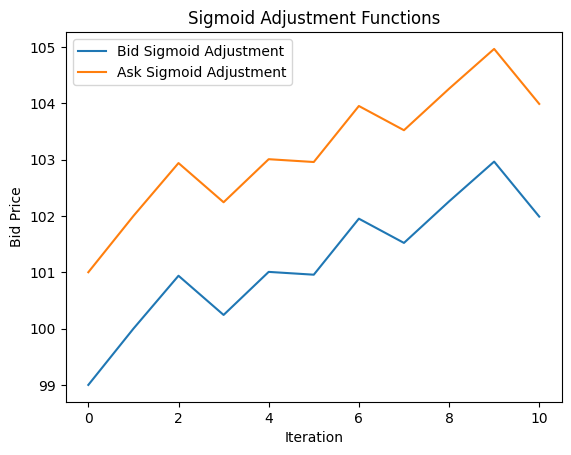

In [9]:
# Part 3
# - Implementation and commentary on different price adjustment function. (Why is it better/worse? Is there an optimal function?)

# Define alternative price adjustment functions
def linear_adjustment(of):
    return 0.1 * of  # Linear adjustment with a small coefficient

def exponential_adjustment(of):
    # Cap the input to np.exp to avoid overflow
    capped_of = np.clip(abs(of), -100, 100)  # Adjust the range as needed
    return np.sign(of) * np.exp(capped_of)

def sigmoid_adjustment(of):
    return np.tanh(of)  # Sigmoid adjustment

v=np.random.normal(100,10)
iterations = 10
# Simulate with different adjustment functions
def simulate_with_adjustment(price_adj_function):
    market_maker_quotes = [(99, 101)]
    order_flow = []
    for i in range(iterations):
        midprice = (market_maker_quotes[-1][0] + market_maker_quotes[-1][1]) / 2
        uninformed_trader_of = np.random.normal(0, 1)
        informed_trader_of = (v - midprice)
        total_order_flow = uninformed_trader_of + informed_trader_of
        
        # Update market maker quotes
        last_bid = market_maker_quotes[-1][0]
        last_ask = market_maker_quotes[-1][1]
        price_adjustment = price_adj_function(total_order_flow)
        
        # Handle NaN or inf values
        if not np.isfinite(price_adjustment):
            price_adjustment = 0  # Or some other fallback value
        
        new_bid = last_bid + price_adjustment
        new_ask = last_ask + price_adjustment
        
        # Store data
        order_flow.append(total_order_flow)
        market_maker_quotes.append((new_bid, new_ask))
    
    return market_maker_quotes

# Simulate with different functions
linear_quotes = simulate_with_adjustment(linear_adjustment)
exponential_quotes = simulate_with_adjustment(exponential_adjustment)
sigmoid_quotes = simulate_with_adjustment(sigmoid_adjustment)

# Plot results
plt.plot([x[0] for x in linear_quotes], label='Bid Linear Adjustment')
plt.plot([x[1] for x in linear_quotes], label='Ask Linear Adjustment')
plt.xlabel('Iteration')
plt.ylabel('Bid Price')
plt.title('Linear Price Adjustment Function')
plt.legend()
plt.show()


# Plot results
plt.plot([x[0] for x in exponential_quotes], label='Bid Exponential Adjustment')
plt.plot([x[1] for x in exponential_quotes], label='Ask Exponential Adjustment')
plt.xlabel('Iteration')
plt.ylabel('Bid Price')
plt.title('Exponential Price Adjustment Functions')
plt.legend()
plt.show()


# Plot results
plt.plot([x[0] for x in sigmoid_quotes], label='Bid Sigmoid Adjustment')
plt.plot([x[1] for x in sigmoid_quotes], label='Ask Sigmoid Adjustment')
plt.xlabel('Iteration')
plt.ylabel('Bid Price')
plt.title('Sigmoid Adjustment Functions')
plt.legend()
plt.show()

#Comments
#Linear Adjustment -> Adjusts prices proportionally to the order flow. Can lead to extreme price movements for large order flows

#Exponential Adjustment -> Adjusts prices exponentially based on the magnitude of order flow. Can overreact and cause instability

#Sigmoid Adjustment -> Adjusts prices smoothly, saturating for large order flows. Less sensitive to small order flows

#The sigmoid function looks better as it balances sensitivity and stability.
# there is no single optimal function as function depends on the market context and the desired trade-off between responsiveness and stability.


